# Day 8: Space Image Format

https://adventofcode.com/2019/day/8

## Setup

In [1]:
using Images: colorview, Gray

In [2]:
IN = readlines("input/08.txt")[1]
DIMS = [25, 6]
;

## Implementation

In [3]:
str2imin(input) = parse.(Int, split(input, ""))

function tolayers(input, dims)
    n_in = length(input)
    layersize = prod(dims)
    n_layers, rem = divrem(n_in, layersize)
    @assert rem == 0
    [reshape(chunk, dims...) for chunk in eachcol(reshape(input, layersize, n_layers))]
end

showlayer(layer) = println(layer')

countdigit(layer, digit=0) = sum(layer .== digit)

function check1(layers)
    layer = layers[argmin(countdigit.(layers, 0))]
    n1, n2 = countdigit(layer, 1), countdigit(layer, 2)
    n1 * n2
end

function decode(layers)
    dims = size(layers[1])
    im = copy(layers[1])
    for layer in Iterators.reverse(layers)
        for i in 1:dims[1]
            for j in 1:dims[2]
                v = layer[i,j]
                if v != 2
                    im[i,j] = v
                end
            end
        end
    end
    return im
end

function showim(imdecoded)
    colorview(Gray, imdecoded' ./ 1 )
end
;

## Tests

In [4]:
test1 = "123456789012"
itest1 = str2imin(test1)
layers1 = tolayers(str2imin(test1), [3,2])
showlayer.(layers1);

[1 2 3; 4 5 6]
[7 8 9; 0 1 2]


In [5]:
check1(layers1)

1

In [6]:
test2 = "0222112222120000"
layers2 = tolayers(str2imin(test2), [2,2])
showlayer.(layers2);

[0 2; 2 2]
[1 1; 2 2]
[2 2; 1 2]
[0 0; 0 0]


In [7]:
decode(layers2)

2×2 Array{Int64,2}:
 0  1
 1  0

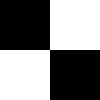

In [8]:
showim(decode(layers2))

## Part One

In [9]:
LAYERS = tolayers(str2imin(IN), DIMS);

In [10]:
check1(LAYERS)

1320

## Part Two

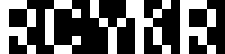

In [11]:
showim(decode(LAYERS))